# Klik - Rozgryzienie problemu nowymi metodami

In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Sat Apr 11 20:28:39 2020


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie.csv', sep=';')
print(df.shape)
print()
print(df.columns)
df.head(5)

(3619621, 24)

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9'],
      dtype='object')


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
0,93718246913880603,0,17030100,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,0,105,119743,10320,10050,12264,13,10427,100000,61
1,93718246913880604,0,17030100,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,105,115706,10320,10050,11722,10,10035,-1,79
2,93718246913880605,0,17030100,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,0,105,120352,10320,10050,12333,10,10039,-1,157
3,93718246913880606,0,17030100,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,0,105,117037,10320,10050,11934,12,10039,-1,16
4,93718246913880607,0,17030100,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,...,2,105,118993,10320,10050,12161,10,10035,100148,157


In [3]:
print('Time to complete the task')
print('minutes: ', (time.time() - start_time)/60) ## koniec pomiaru czasu

Time to complete the task
minutes:  0.22604812781016032


### Sprawdzam kompletność danych
dane są kompletne

In [4]:
df.isnull().sum()

id                     0
klik                   0
data_godzina           0
baner_pozycja          0
strona_id              0
strona_domena          0
strona_kategoria       0
aplikacja_id           0
aplikacja_domena       0
aplikacja_kategoria    0
urz_id                 0
urz_ip                 0
urz_model              0
urz_typ                0
urz_polaczenie         0
kat1                   0
kat2                   0
kat3                   0
kat4                   0
kat5                   0
kat6                   0
kat7                   0
kat8                   0
kat9                   0
dtype: int64

Ściągnąłem ogromną bazę danych której nie obrobie moimi zasobami. sposób na to jest zrobić reprezentatywną próbkę. Nie robic tego przez nrows bo to wygląd ajak szereg czasowy. Trzeba wybrać próbke przypadkową.
Próbka wielkości 10% populacji.

In [5]:
df2 = df.sample(frac = 0.03, random_state=10)
df2.shape

(108589, 24)

### Sprawdzam format danych

In [6]:
df2.dtypes

id                      int64
klik                    int64
data_godzina            int64
baner_pozycja           int64
strona_id              object
strona_domena          object
strona_kategoria       object
aplikacja_id           object
aplikacja_domena       object
aplikacja_kategoria    object
urz_id                 object
urz_ip                 object
urz_model              object
urz_typ                 int64
urz_polaczenie          int64
kat1                    int64
kat2                    int64
kat3                    int64
kat4                    int64
kat5                    int64
kat6                    int64
kat7                    int64
kat8                    int64
kat9                    int64
dtype: object

### Teraz sprawdzamy, które zmienne to zmienne kategorycznwe, a które to zmienne numeryczne

In [7]:
a,b = df2.shape     #<- ile mamy kolumn
b


import numpy as np

for i in range(1,b):
    i = df2.columns[i]
    h = df2[i].nunique()
    f = df2[i].dtypes
          
    print(f,"---",h,"---", i)

int64 --- 2 --- klik
int64 --- 216 --- data_godzina
int64 --- 7 --- baner_pozycja
object --- 1526 --- strona_id
object --- 1389 --- strona_domena
object --- 20 --- strona_kategoria
object --- 1378 --- aplikacja_id
object --- 94 --- aplikacja_domena
object --- 25 --- aplikacja_kategoria
object --- 18432 --- urz_id
object --- 83123 --- urz_ip
object --- 3237 --- urz_model
int64 --- 4 --- urz_typ
int64 --- 4 --- urz_polaczenie
int64 --- 7 --- kat1
int64 --- 1630 --- kat2
int64 --- 8 --- kat3
int64 --- 9 --- kat4
int64 --- 379 --- kat5
int64 --- 4 --- kat6
int64 --- 62 --- kat7
int64 --- 153 --- kat8
int64 --- 55 --- kat9


### Które z tych funkcji są kategoryczne?

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 10 unikalnych wartości

In [8]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    h = df2[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
klik --- int64 --- 2
baner_pozycja --- int64 --- 7
strona_id --- object --- 1526
strona_domena --- object --- 1389
strona_kategoria --- object --- 20
aplikacja_id --- object --- 1378
aplikacja_domena --- object --- 94
aplikacja_kategoria --- object --- 25
urz_id --- object --- 18432
urz_ip --- object --- 83123
urz_model --- object --- 3237
urz_typ --- int64 --- 4
urz_polaczenie --- int64 --- 4
kat1 --- int64 --- 7
kat3 --- int64 --- 8
kat4 --- int64 --- 9
kat6 --- int64 --- 4


#### Potrzebujemy listy z numerami kolumnaby użyć jej w CatBoost

In [9]:
categorical_fun = np.where((df2.dtypes == np.object)|(df2.nunique() <= 10))[0]
categorical_fun

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20])

### Wyświetlamy co to za kolumny

In [10]:
PPS = categorical_fun

KOT_MIC = dict(zip(df2, PPS))
KOT_sorted_keys_MIC = sorted(KOT_MIC, key=KOT_MIC.get, reverse=False)

for r in KOT_sorted_keys_MIC:
    print (r, KOT_MIC[r])

id 1
klik 3
data_godzina 4
baner_pozycja 5
strona_id 6
strona_domena 7
strona_kategoria 8
aplikacja_id 9
aplikacja_domena 10
aplikacja_kategoria 11
urz_id 12
urz_ip 13
urz_model 14
urz_typ 15
urz_polaczenie 17
kat1 18
kat2 20


Ponieważ chce użyć modelu CatBoost nie potrzebuje kodować wartości dyskretnych (tekstowych) na wartości numeryczne.
Niestety najpierw chce użyć narzędzia selekcji zmiennych SHAP które wymaga kodowania zmiennych.

### Koduje zmienne tekstowe

In [11]:
a,b = df2.shape     #<- ile mamy kolumn
b



print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df2[i] = pd.Categorical(df2[i]).codes
        
            continue
    
        

DISCRETE FUNCTIONS CODED
------------------------
strona_id --- object
strona_domena --- object
strona_kategoria --- object
aplikacja_id --- object
aplikacja_domena --- object
aplikacja_kategoria --- object
urz_id --- object
urz_ip --- object
urz_model --- object


### <span style="color:blue"> Dzielimy zbiór na zbiory treningowe i testowe</span>

In [12]:
from sklearn.model_selection import train_test_split

X = df2.drop('klik', axis=1)
y = df2['klik']


X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

In [13]:
X_train.head(3)

,id,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,urz_id,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
479545,93718246914360148,17030205,0,180,1326,2,1266,36,0,12343,...,0,105,121790,10320,10050,12513,13,10035,100188,68
1326044,93718246915206647,17030323,0,180,1326,2,1266,36,0,12343,...,0,105,115701,10320,10050,11722,10,10035,-1,79
2137912,93718246916018515,17030609,0,799,1098,6,778,57,3,12343,...,3,105,121189,10320,10050,12424,11,10161,100193,71


### Poziom zbilansowania zbioru wynikowego

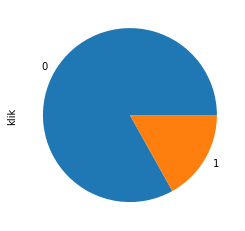

In [14]:
y_train.value_counts(dropna = False, normalize=True).plot(kind='pie')

Szkolenie modelowe

Teraz stwórzmy sam model: poszlibyśmy tutaj z parametrami domyślnymi (ponieważ zapewniają one naprawdę dobrą linię bazową prawie przez cały czas), jedyną rzeczą, którą chcielibyśmy tutaj określić, jest parametr custom_loss, ponieważ dałoby to nam możliwość zobaczenia co się dzieje pod względem tego wskaźnika konkurencji - dokładności, a także możliwości obserwowania utraty logów, ponieważ byłoby to bardziej płynne w przypadku zestawu danych o takim rozmiarze.
- custom_loss metryka użyta podczas szkolenia, wybrane: [„accuracy”] https://catboost.ai/docs/search/?query=%27Accuracy%27
- random_seed = 42 Losowe nasiona użyte do treningu. Te losowe wartości są za każdym razem takie same.
- logging_level = ‘Silent’  Poziom logowania, aby przejść do standardowego wyjścia. „Cichy” - nie wysyłaj żadnych danych logowania na standardowe wyjście. „Verbose” - wyślij następujące dane na standardowe wyjście, a następnie pokaże w modelu. Dopasuj całą ścieżkę uczenia się. „Informacje” lub „Debugowanie” - wyświetlanie dodatkowych informacji i liczby drzew.

###  Zdefiniowanie modelu bez deklarowania zmiennych kategorycznych

In [15]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [16]:
model = CatBoostClassifier(
    custom_loss=['AUC'],
    random_seed=42,
    logging_level='Silent'
)

In [17]:
model.fit(
    X_train, y_train,
    cat_features=categorical_fun,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [18]:
y_predict = model.predict(X_validation)
y_predict[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    
    import scikitplot as skplt
    from plot_metric.functions import BinaryClassification
    from sklearn.metrics import precision_recall_curve

       
    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print('Valuation for test data only:')
    print(classification_report(ytest, model.predict(Xtest)))
    
    ## ----------AUC-----------------------------------------
     
    print('---------------------') 
    AUC_train_1 = metrics.roc_auc_score(ytrain,model.predict_proba(Xtrain)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(ytest,model.predict_proba(Xtest)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print('---------------------')    
      
    print('Valuation for test data only:')

    y_probas1 = model.predict_proba(Xtest)[:,1]
    y_probas2 = model.predict_proba(Xtest)

### ---plot_roc_curve--------------------------------------------------------
    plt.figure(figsize=(13,4))

    plt.subplot(1, 2, 1)
    bc = BinaryClassification(ytest, y_probas1, labels=["Class 1", "Class 2"])
    bc.plot_roc_curve() 


### --------precision_recall_curve------------------------------------------

    plt.subplot(1, 2, 2)
    precision, recall, thresholds = precision_recall_curve(ytest, y_probas1)

    plt.plot(recall, precision, marker='.', label=model)
    plt.title('Precision recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(-0.30, -0.6))
    plt.show()

## ----------plot_roc-----------------------------------------

    skplt.metrics.plot_roc(ytest, y_probas2)
    

Recall Training data:      0.1106
Precision Training data:   0.7346
----------------------------------------------------------------------
Recall Test data:          0.0758
Precision Test data:       0.62
----------------------------------------------------------------------
Confusion Matrix Test data
[[22191   220]
 [ 4378   359]]
----------------------------------------------------------------------
Valuation for test data only:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22411
           1       0.62      0.08      0.14      4737

    accuracy                           0.83     27148
   macro avg       0.73      0.53      0.52     27148
weighted avg       0.80      0.83      0.77     27148

---------------------
AUC_train: 0.806
AUC_test:  0.738
---------------------
Valuation for test data only:


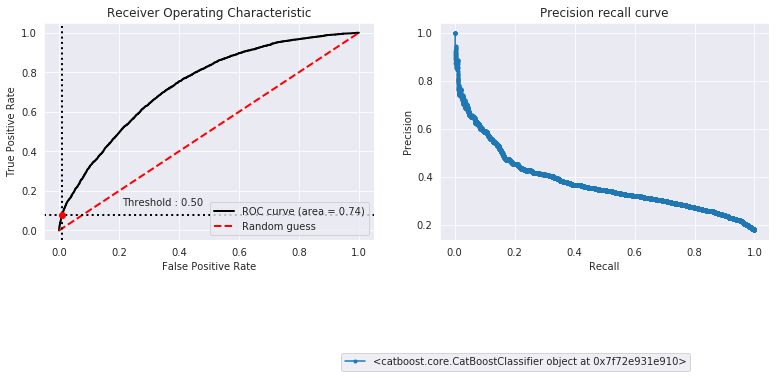

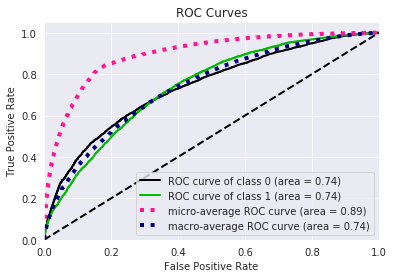

In [26]:
Classification_Assessment(model ,X_train, y_train, X_validation, y_validation)

## Interpretation of SHAP diagnostic charts

In [28]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


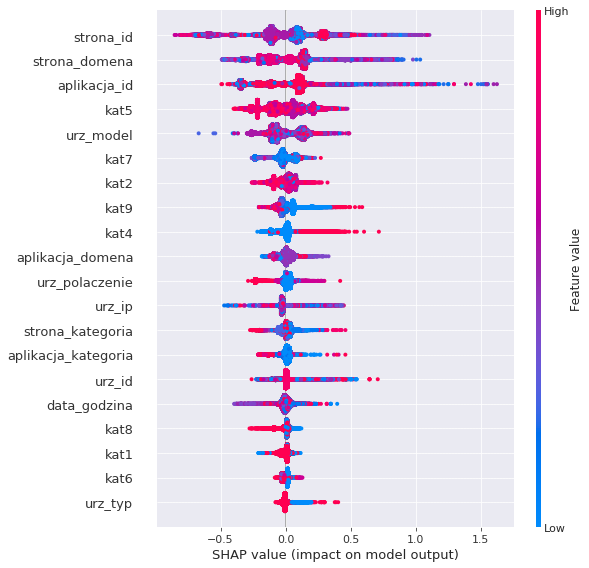

In [30]:
shap.summary_plot (shap_values, X_train)



Interpretacja wykresu
1. Najważniejszymi zmiennymi są: strona_id, urz_ip oraz aplikacja_ip.
2. Strona_id oraz aplikacja_id i strona_domena są również podzielone na dwa stosy,   
3. istnieją funkcje z dwoma stosami, dobrze podzielone przez model: kak6, baner_pozycja,
    
    

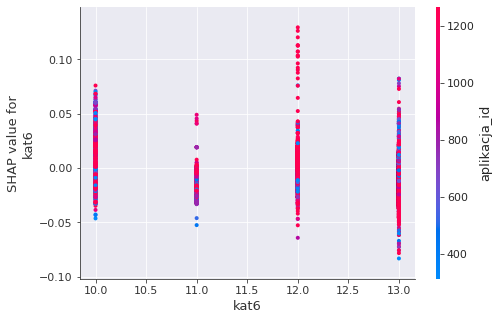

In [29]:
shap.dependence_plot('kat6', shap_values, X_train)

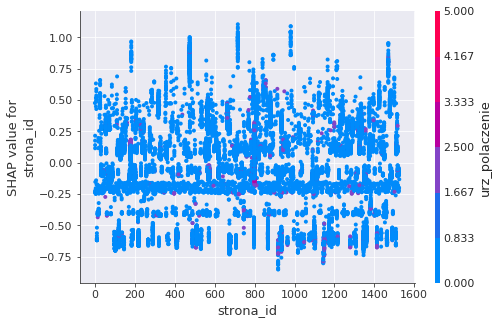

In [31]:
shap.dependence_plot('strona_id', shap_values, X_train)

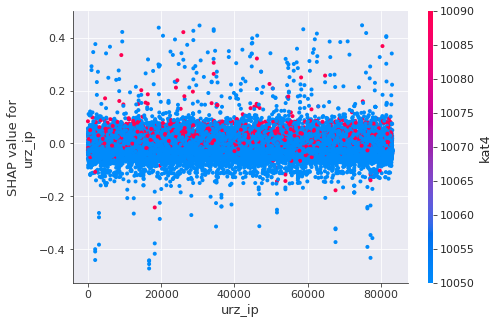

In [32]:
shap.dependence_plot('urz_ip', shap_values, X_train)

## Najlepsze funkcje

In [33]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}

In [34]:
train_pool = Pool(X_train, y_train, cat_features=categorical_fun)
train_pool

In [35]:
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_fun)
validate_pool

## Szukam najlepszych ustawień modelu

In [36]:
## -------linijka jak wywołać najlepsze parametry modelu ---------------------

model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({                  ## <- tutaj model wkłada 'use_best_model'
    'use_best_model': True                  ## to nie są lepsze parametry tylko ten jeden nowy parametr   
})

### ----------------------------------------------------------------------------

best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, best_model.predict(X_validation))
))

Simple model validation accuracy: 0.8307

Best model validation accuracy: 0.8307


## Najlepsze funkcje

In [37]:
model4 = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)

In [38]:
feature_importances = model.get_feature_importance(train_pool)

In [39]:
feature_names = X_train.columns
feature_names

Index(['id', 'data_godzina', 'baner_pozycja', 'strona_id', 'strona_domena',
       'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9'],
      dtype='object')

In [40]:
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

kat5: 14.787507376263138
strona_domena: 10.756102718452363
strona_id: 10.522354991727553
aplikacja_id: 9.333771951459413
urz_model: 7.243376350884366
data_godzina: 5.872195811675809
kat2: 5.332903586472591
kat9: 4.7911882638779195
urz_ip: 3.9516026247727924
kat7: 3.932566515242398
urz_id: 3.0931251709146745
aplikacja_domena: 2.9663798276250097
kat4: 2.817809519212283
aplikacja_kategoria: 2.6062637542772467
kat8: 2.4655012534423606
urz_polaczenie: 2.3339531128525173
strona_kategoria: 1.9961218290785772
urz_typ: 1.9199714449527763
kat1: 1.5456667180609769
kat6: 0.8999901539541058
baner_pozycja: 0.8128629373826678
kat3: 0.01878408741844355
id: 0.0
